<a href="https://colab.research.google.com/github/PhuongTa/hocmay/blob/main/Ch%C6%B0%C6%A1ng_3_Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K·∫øt N·ªëi + T·∫£i D·ªØ Li·ªáu

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# IMPORT LIBRARIES
import os
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# to make output stable across runs
random_state = 42


# Where to save figure
PROJECT_ROOT_DIR = "drive/MyDrive/HOCMAY/working/"
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images",CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

#SOURCE_PATH = 'datasets/mnist'

In [4]:
IMAGES_PATH

'drive/MyDrive/HOCMAY/working/images/classification'

In [5]:
# Function to save figure
def save_fig(fig_id, tight_layout = True, fig_extension = 'png', resolution = 300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure... " + fig_id)
  if tight_layout:
    plt.tight_layout()

  plt.savefig(path, format=fig_extension, dpi=resolution)



#MNIST version 1.0

**L∆∞u √Ω:** t·ª´ Scikit-Learn 0.24, theo m·∫∑c ƒë·ªãnh th√¨ `fetch_openml()` s·∫Ω tr·∫£ v·ªÅ m·ªôt `DataFrame` c·ªßa Pandas.

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

* data ch·ª©a m·ªôt m·∫£ng hai chi·ªÅu, m·ªói h√†ng ·ª©ng v·ªõi m·ªôt m·∫´u d·ªØ li·ªáu v√† m·ªói c·ªôt ·ª©ng v·ªõi m·ªôt ƒë·∫∑c tr∆∞ng
* target ch·ª©a m·ªôt m·∫£ng c√°c nh√£n

In [7]:
X, y = mnist["data"], mnist["target"]

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

MNIST ch·ª©a `70,000 ·∫£nh` v·ªõi `784 ƒë·∫∑c tr∆∞ng` tr√™n t·ª´ng ·∫£nh.
* L√≠ do l√† m·ªói ·∫£nh ch·ª©a `28√ó28 ƒëi·ªÉm ·∫£nh`, v√† m·ªói ƒë·∫∑c tr∆∞ng ƒë·∫°i di·ªán cho c∆∞·ªùng ƒë·ªô c·ªßa m·ªôt ƒëi·ªÉm ·∫£nh v·ªõi gi√° tr·ªã n·∫±m trong kho·∫£ng `t·ª´ 0 (tr·∫Øng) ƒë·∫øn 255 (ƒëen)`.

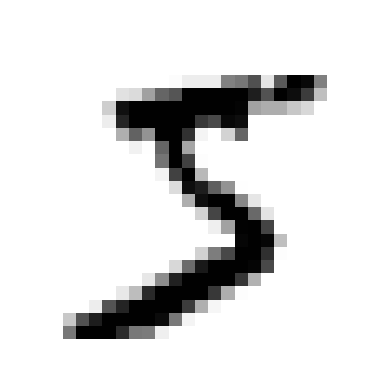

In [10]:
# Ki·ªÉm tra m·∫´u ƒë·∫ßu ti√™n
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap= "binary")
plt.axis("off")
plt.show()

In [11]:
y[0]

'5'

C√°c nh√£n `(labels)` ƒëang ƒë∆∞·ª£c `l∆∞u tr·ªØ d∆∞·ªõi d·∫°ng d·ªØ li·ªáu chu·ªói`, Ta c·∫ßn `chuy·ªÉn sang d·ªØ li·ªáu s·ªë`.

In [12]:
y = y.astype(np.uint8)
y[0]

5

In [13]:
# Plot_digit
def plot_digit(data):
  image = data.reshape(28,28)
  plt.imshow(image, cmap = mpl.cm.binary,
             interpolation="nearest")
  plt.axis("off")

In [14]:
# plot_digit (extra)
def plot_digit(instances, images_per_row=10, **options):
  # shape(28,28)
  size = 28

  # ƒë·∫£m b·∫£o image_per_row kh√¥ng v∆∞·ª£t qu√° s·ªë l∆∞·ª£ng instances
  images_per_row = min(len(instances), images_per_row)

  # reshape all images in instances
  images = [instance.reshape(size, size) for instance in instances]

  # T√≠nh s·ªë h√†ng c·∫ßn thi·∫øt ƒë·ªÉ hi·ªÉn th·ªã t·∫•t c·∫£ h√¨nh ·∫£nh.
  n_row_indeed = (len(instances) - 1) // images_per_row + 1
                   # (98 - 1 // 10) + 1 = 10

  # danh s√°ch images hi·ªÉn th·ªã
  row_images = []

  # T√≠nh s·ªë l∆∞·ª£ng h√¨nh tr·ªëng c·∫ßn th√™m v√†o ƒë·ªÉ ƒë√¢·ª≥ l∆∞·ªõi
  n_image_empty = n_row_indeed * images_per_row - len(instances)
                  # 10 * 10 - 98 = 2 (√¥ tr·ªëng)

  # Th√™m c√°c h√¨nh ·∫£nh r·ªóng v√†o cu·ªëi danh s√°ch ƒë·ªÉ ƒëi·ªÅn ƒë·∫ßy c√°c √¥ tr·ªëng.
  images.append(np.zeros((size, size * n_image_empty)))

  for row in range(n_row_indeed):
    # L·∫•y ra m·ªôt h√†ng h√¨nh ·∫£nh t·ª´ danh s√°ch images.
    rimages = images[row * images_per_row : (row + 1) * images_per_row]

    # K·∫øt h·ª£p c√°c h√¨nh ·∫£nh trong h√†ng l·∫°i th√†nh m·ªôt h√¨nh ·∫£nh l·ªõn v√† th√™m n√≥ v√†o row_images.
    row_images.append(np.concatenate(rimages, axis=1))

  # K·∫øt h·ª£p c√°c h√†ng h√¨nh ·∫£nh l·∫°i th√†nh m·ªôt h√¨nh ·∫£nh l·ªõn.
  image = np.concatenate(row_images, axis=0)

  plt.imshow(image, cmap=mpl.cm.binary, **options)
  plt.axis("off")

Saving figure... more_digits_plot


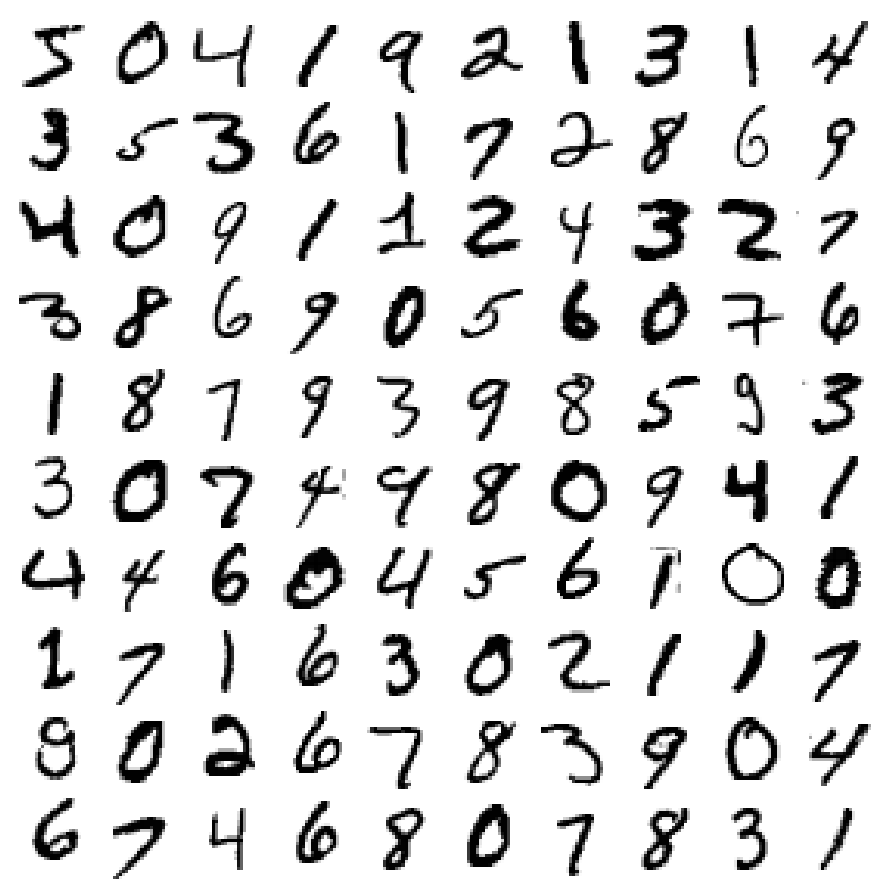

In [15]:
# print first - 100 numbers
plt.figure(figsize = (9,9))
example_images = X[:100]
plot_digit(example_images, images_per_row = 10)

save_fig("more_digits_plot")
plt.show()

Theo `mnist["DESCR"]`: It can be split in a **`training set`** of the first **`60,000 examples`**, and a **`test set`** of `10,000 examples`

In [16]:
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

Ta c·∫ßn ƒë·∫£m b·∫£o t·∫•t c·∫£ c√°c fold trong ki·ªÉm ƒë·ªãnh ch√©o s·∫Ω t∆∞∆°ng t·ª± (kh√¥ng thi·∫øu v√†i ch·ªØ s·ªë), v√† m·ªôt s·ªë thu·∫≠t to√°n nh·∫°y c·∫£m v·ªõi th·ª© t·ª± m·∫´u hu·∫•n luy·ªán v√† s·∫Ω ho·∫°t ƒë·ªông k√©m n·∫øu li√™n t·ª•c nh·∫≠n ƒë∆∞·ª£c nhi·ªÅu m·∫´u c√≥ c√πng nh√£n => n√™n ta s·∫Ω x√°o tr·ªôn t·∫≠p hu·∫•n luy·ªán.

Tuy nhi√™n, *T·∫¨P HU·∫§N LUY·ªÜN ƒê√É ƒê∆Ø·ª¢C X√ÅO TR·ªòN S·∫¥N.*

# HU·∫§N LUY·ªÜN B·ªò PH√ÇN LO·∫†I NH·ªä PH√ÇN (BINARY CLASSIFICATION)

B√†i to√°n: `B·ªô nh·∫≠n di·ªán s·ªë 5
- X√°c ƒë·ªãnh m·ªôt ch·ªØ s·ªë
- Ch·ªâ ph√¢n bi·ªát gi·ªØa hai l·ªõp 5 v√† kh√¥ng 5

In [17]:
y_train_5 =(y_train == 5) # True v·ªõi t·∫•t c·∫£ l√† 5, False v·ªõi c√°c s·ªë kh√°c
y_test_5 = (y_test == 5)

## M√¥ h√¨nh `(SGD)` H·∫° Gradient Ng·∫´u nhi√™n (Stochastic Gradient Descent).

∆Øu ƒëi·ªÉm l√† kh·∫£ nƒÉng x·ª≠ l√Ω t·∫≠p d·ªØ li·ªáu r·∫•t l·ªõn hi·ªáu qu·∫£.

- Hu·∫•n luy·ªán t·ª´ng m·∫´u d·ªØ li·ªáu ƒë·ªôc l·∫≠p
- Th√≠ch h·ª£p cho h·ªçc tr·ª±c tuy·∫øn.

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42) #max_iter=1000, tol=1e-3 #default
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [19]:
sgd_clf.predict([some_digit])

array([ True])

## S·ª≠ d·ª•ng cross_val_score c·ªßa sklearn

In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Ta ƒë·∫°t ƒë∆∞·ª£c ƒë·ªô ch√≠nh x√°c 95% tr√™n t·∫•t c·∫£ c√°c fold ki·ªÉm ƒë·ªãnh ch√©o??? - c√≥ n√™n vui m·ª´ng?
- **Ta c·∫ßn ki·ªÉm tra th√™m**

H√£y xem th·ª≠ ƒë·ªô ch√≠nh x√°c c·ªßa m·ªôt b·ªô ph√¢n lo·∫°i c·ª±c k·ª≥ ƒë∆°n gi·∫£n l√† `g√°n cho t·∫•t c·∫£ c√°c ·∫£nh c√πng m·ªôt nh√£n ‚Äúkh√¥ng ph·∫£i 5‚Äù`

In [21]:
from sklearn.base import BaseEstimator

class Never5Classier(BaseEstimator):
  def fit(self, X, y=None):
    """
    Ph∆∞∆°ng th·ª©c kh√¥ng th·ª±c hi·ªán b·∫•t k·ª≥ vi·ªác ƒë√†o t·∫°o n√†o v√† ch·ªâ ƒë∆°n gi·∫£n tr·∫£ v·ªÅ ch√≠nh b·∫£n th√¢n ƒë·ªëi t∆∞·ª£ng.
    ƒêi·ªÅu n√†y ph·∫£n √°nh √Ω nghƒ©a c·ªßa m√¥ h√¨nh n√†y: kh√¥ng c·∫ßn ƒë√†o t·∫°o, v√¨ n√≥ lu√¥n lu√¥n d·ª± ƒëo√°n sai
    """
    return self

  def predict(self, X):
    # Tr·∫£ v·ªÅ gi√° tr·ªã to√†n False v√¨ lu√¥n d·ª± ƒëo√°n kh√¥ng ph·∫£i l√† 5.
    return np.zeros((len(X), 1), dtype=bool)

In [22]:
never_5_clf = Never5Classier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring= "accuracy")

array([0.91125, 0.90855, 0.90915])

* M√¥ h√¨nh n√†y c√≥ ƒë·ªô ch√≠nh x√°c  tr√™n 90%. **WOW!!!** - ƒê·ª´ng v·ªôi m·ª´ng

* ƒêi·ªÅu n√†y x·∫£y ra l√† do ch·ªâ c√≥ kho·∫£ng 10% s·ªë ·∫£nh 5.
* N·∫øu lu√¥n d·ª± ƒëo√°n m·ªôt ·∫£nh `kh√¥ng ph·∫£i 5`, ta s·∫Ω ƒë√∫ng kho·∫£ng **90%** s·ªë l·∫ßn.

ƒêi·ªÅu n√†y ch·ª©ng m√¨nh `Accuracy` kh√¥ng ph·∫£i ph√©p ƒëo ch·∫•t l∆∞·ª£ng cho c√°c b·ªô ph√¢n lo·∫°i `classifier`, ƒë·∫∑c bi·ªát l√† khi ta ƒëang l√†m vi·ªác v·ªõi t·∫≠p d·ªØ li·ªáu l·ªách `Skewed dataset` t·ª©c l√† khi m·ªôt v√†i l·ªõp c√≥ nhi·ªÅu d·ªØ li·ªáu h∆°n c√°c l·ªõp kh√°c.

## H√†m ƒë√°nh gi√° s·ª≠ d·ª•ng StratifiedKFold
- C√≥ ch·ª©c nƒÉng t∆∞∆°ng t·ª± Cross_val_score.

L·ªõp `StratifiedKFold` th·ª±c hi·ªán `l·∫•y m·∫´u stratified` ƒë·ªÉ t·∫°o ra c√°c fold ch·ª©a t·ªâ l·ªá ƒë·∫°i di·ªán c·ªßa m·ªói l·ªõp. T·∫°i m·ªói v√≤ng l·∫∑p, ƒëo·∫°n m√£ t·∫°o m·ªôt b·∫£n sao c·ªßa b·ªô ph√¢n lo·∫°i, hu·∫•n luy·ªán b·∫£n sao ƒë√≥ tr√™n c√°c fold hu·∫•n luy·ªán v√† d·ª± ƒëo√°n tr√™n fold ki·ªÉm tra, r·ªìi sau ƒë√≥ ƒë·∫øm s·ªë l∆∞·ª£ng v√† t√≠nh t·ªâ l·ªá d·ª± ƒëo√°n ƒë√∫ng.

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle= True, random_state=42)
scores = []
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)

  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  scores.append(n_correct / len(y_pred))

print(scores)

[0.9669, 0.91625, 0.96785]


## Ma tr·∫≠n nh·∫ßm l·∫´n (Confusion matrix)

In [24]:
from sklearn.model_selection import cross_val_predict

#cross_val_predict() th·ª±c hi·ªán ki·ªÉm ƒë·ªãnh ch√©o K-fold,
# nh∆∞ng h√†m n√†y tr·∫£ v·ªÅ c√°c d·ª± ƒëo√°n tr√™n m·ªói fold ki·ªÉm tra thay v√¨ ƒëi·ªÉm s·ªë ƒë√°nh gi√°.

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

```
                                  D·ª± ƒëo√°n
    Th·ª±c t·∫ø          |   √Çm t√≠nh     |      D∆∞∆°ng t√≠nh
---------------------------------------------------------                       
                     |  True-Neg.    |     False-Pos.
(`!5`) √Çm t√≠nh       |   53892      |       687
---------------------------------------------------------
                     |  False-Neg    |      True-Pos
(`5`)  D∆∞∆°ng t√≠nh    |   1891       |       3530
                                                          ^
                                                          | Precision
                                                <- Recall
```

- Ph√©p ƒëo ƒë·ªô ch√≠nh x√°c c·ªßa c√°c d·ª± ƒëo√°n cho l·ªõp d∆∞∆°ng (precision)
  ```
  precision = TP / (TP + FP)
  ```
  
  - TP: m·∫´u d∆∞∆°ng t√≠nh th·∫≠t.
  - FP: m·∫´u d∆∞∆°ng t√≠nh gi·∫£

- ƒê·ªô nh·∫°y (Sensitivity) ho·∫∑c t·ª∑ l·ªá d∆∞∆°ng t√≠nh th·∫≠t (`true positive rate - TPR)`: l√† t·ª∑ l·ªá m·∫´u d∆∞∆°ng ƒë∆∞·ª£c ph√°t hi·ªán ƒë√∫ng b·ªüi b·ªô ph√¢n lo·∫°i.
  ```
  recall = TP / (TP + FN)
  ```
  FN: m·∫´u √¢m t√≠nh gi·∫£


In [26]:
y_train_perfect_predictions = y_train_5 # g·ªâ·∫£ s·ª≠ ch√∫ng ta ƒë·∫°t ƒë∆∞·ª£c s·ª± ho√†n h·∫£o.
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [27]:
from sklearn.metrics import precision_score, recall_score
print("ƒê·ªô ch√≠nh x√°c: ", precision_score(y_train_5, y_train_pred)) # 3530 / (3530 + 687)

print("ƒê·ªô nh·∫°y: ", recall_score(y_train_5, y_train_pred)) # 3530 / (3530 + 1891)


ƒê·ªô ch√≠nh x√°c:  0.8370879772350012
ƒê·ªô nh·∫°y:  0.6511713705958311


- Trong t·ªïng s·ªë l·∫ßn b·ªô ph√¢n lo·∫°i: g√°n nh√£n `m·ªôt ·∫£nh l√† 5`, n√≥ ch·ªâ ƒë√∫ng `precision: 83.7%` s·ªë l·∫ßn.
- Tr√™n t·ªïng `s·ªë ·∫£nh s·ªë 5`, n√≥ ch·ªâ ph√°t hi·ªán ƒë∆∞·ª£c `recall: 65.1%` s·ªë ·∫£nh.

### F-Score
- trung b√¨nh ƒëi·ªÅu ho√† c·ªßa recall v√† precision.
- M·ªôt b·ªô ph√¢n lo·∫°i ch·ªâ c√≥ th·ªÉ ƒë·∫°t ƒë∆∞·ª£c `ch·ªâ s·ªë F1 cao` n·∫øu `c·∫£ presion v√† recall ƒë·ªÅu cao`
```
    F1 = 2 X (precision x recall) / (precision + recall)
```    
    ho·∫∑c
```    
    F1 = TP / (TP + (FN + FP)/2)
```


In [28]:
from sklearn.metrics import f1_score

f1_scr = f1_score(y_train_5, y_train_pred)
print("f1_score: ", f1_scr)

f1_score:  0.7325171197343846


## Precision/Recall Trade off

In [29]:
# S·ª≠ d·ª•ng decision_function() thay predict(). Tr·∫£ v·ªÅ s·ªë ƒëi·ªÉm c·ªßa m·ªói m·∫´u
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [30]:
threshold = 0 # S·ª≠ d·ª•ng ng∆∞·ª°ng 0 c√πng ph∆∞∆°ng th·ª©c predict.
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [31]:
threshold = 9000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

K·∫øt qu·∫£ n√†y x√°c nh·∫≠n r·∫±ng tƒÉng m·ª©c ng∆∞·ª°ng s·∫Ω l√†m gi·∫£m recall. B·ª©c ·∫£nh ƒë∆∞·ª£c ki·ªÉm tra l√† ch·ªØ s·ªë 5, b·ªô ph√¢n lo·∫°i ƒë√£ d·ª± ƒëo√°n ƒë√∫ng khi m·ª©c ng∆∞·ª°ng b·∫±ng 0, nh∆∞ng l·∫°i th·∫•t b·∫°i khi m·ª©c ng∆∞·ª°ng tƒÉng l√™n 9,000.

### L√†m sao x√°c ƒë·ªãnh ng∆∞·ª°ng ph√π h·ª£p?
- S·ª≠ d·ª•ng cross_val_predict() d·ª± ƒëo√°n c√°c m·∫´u trong t·∫≠p hu·∫•n luy·ªán nh∆∞ng tr·∫£ v·ªÅ ƒëi·ªÉm quy·∫øt ƒë·ªãnh thay v√¨ d·ª± ƒëo√°n.

In [32]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,
                             cv=3, method ="decision_function")

In [33]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure... precision_recall_vs_threshold_plot


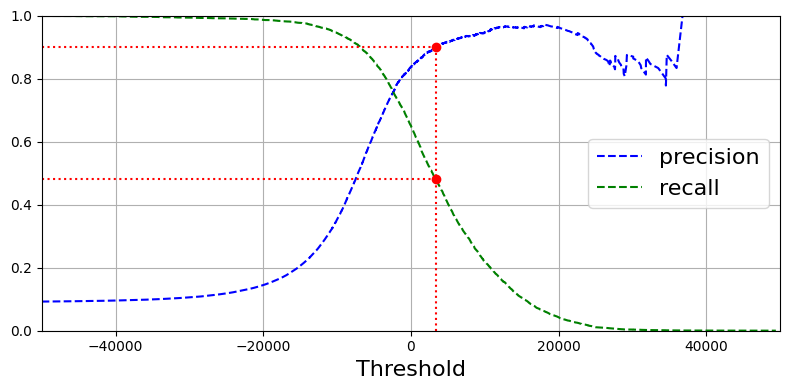

In [37]:
# V·∫Ω ƒë·ªì th·ªã c·ªßa precision v√† recall theo threshold

def plot_precision_recall_vs_threshold(preicions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1],"g--", label="recall")
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000,50000, 0, 1])

recall_90_precision= recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >=0.90)]


plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
save_fig("precision_recall_vs_threshold_plot")
plt.show()


In [38]:
(y_train_pred == (y_scores > 0)).all()

True

Saving figure... precision_vs_recall_plot


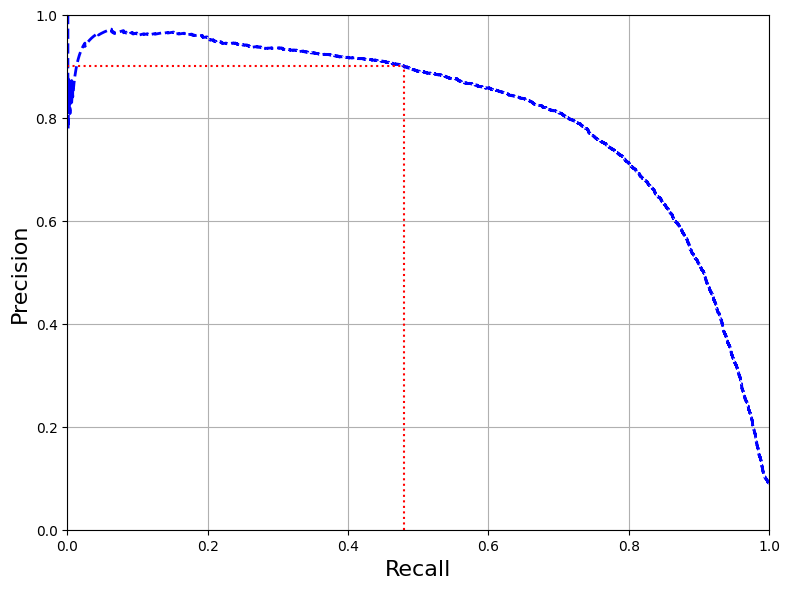

In [39]:
# V·∫Ω ƒë·ªì th·ªã precision_recall

def plot_precision_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b--", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0,1,0,1])
    plt.grid(True)

plt.figure(figsize=(8,6))
plot_precision_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0.,0.9],"r:")
plt.plot([0.0, recall_90_precision],[0.9,0.9], "r:")
save_fig("precision_vs_recall_plot")
plt.show()


- C√≥ th·ªÉ th·∫•y `Precision` b·∫Øt ƒë·∫ßu gi·∫£m nhanh ·ªü kho·∫£ng `Recall 80%`.
- Ta c√≥ th·ªÉ ch·ªçn 1 m·ª©c `Precision/Recall Trade off` ·ªü tr∆∞·ªõc ƒë√≥. VD: 60% - tu·ª≥ thu·ªôc v√†o d·ª± √°n c·ª• th·ªÉ

In [40]:
# np.argmax() cho ta ch·ªâ s·ªë ƒë·∫ßu ti√™n c·ªßa gi√° tr·ªã l·ªõn nh·∫•t
# (gi√° tr·ªã True ƒë·∫ßu ti√™n trong tr∆∞·ªùng h·ª£p n√†y)
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] #~3370
threshold_90_precision

3370.0194991439557

In [41]:
y_train_pred_90=(y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [42]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [43]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

T√¨m m·ª©c recall ·ªü Precision 60%

In [48]:
threshold_60_precision = thresholds[np.argmax(precisions >= 0.60)]
threshold_60_precision

-5411.202076230331

In [49]:
y_train_pred_60 = (y_scores >= threshold_60_precision)
y_train_pred_60

array([ True, False, False, ...,  True, False, False])

In [50]:
precision_score(y_train_5, y_train_pred_60)

0.6000255819902789

In [51]:
recall_score(y_train_5, y_train_pred_60)

0.8653384984320236

## ƒê∆∞·ªùng Cong ROC (Receiver Operating Characteristic)

- V·∫Ω t·ª∑ l·ªá d∆∞∆°ng t√≠nh th·∫≠t `(True Positive Rate TPR - recall)` theo t·ª∑ l·ªá d∆∞∆°ng t√≠nh gi·∫£ `(False Positive Rate - FPR)`

- **FPR**: l√† t·ª∑ l·ªá c√°c m·∫´u √¢m t√≠nh b·ªã ph√¢n lo·∫°i sai th√†nh d∆∞∆°ng t√≠nh v√† b·∫±ng 1.
- **TNR**: l√† t·ª∑ l·ªá c√°c m·∫´u √¢m t√≠nh ƒë∆∞·ª£c ph√¢n lo·∫°i ƒë√∫ng. `(specificity)`

- Do ƒë√≥, ROC l√† bi·ªÉu ƒë·ªì th·ªÉ hi·ªán `sensitivity - recall` theo `1 - specificity`

In [52]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_train_5, y_scores)

Saving figure... roc_curve_plot


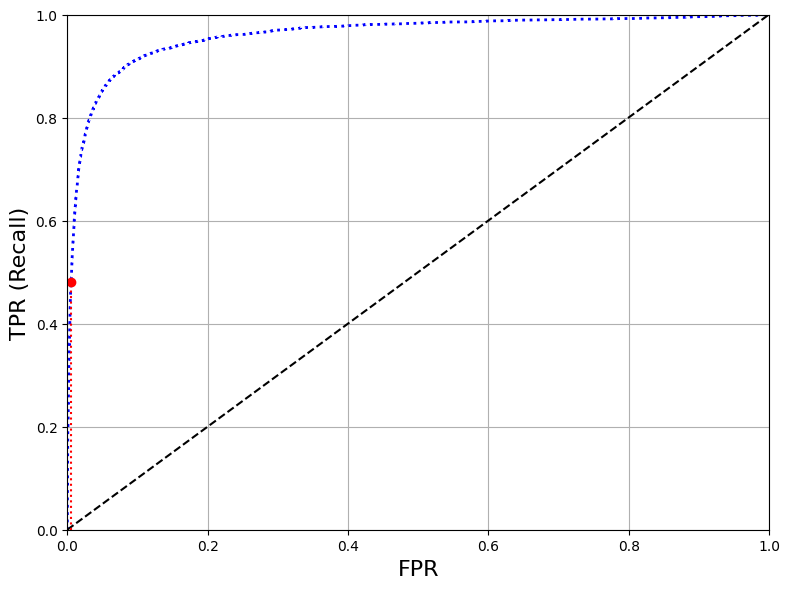

In [72]:
def plot_roc_curve(fpr, tpr, color="b:", label=None):
    plt.plot(fpr, tpr, f"{color}",linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("FPR", fontsize=16)
    plt.ylabel("TPR (Recall)", fontsize=16)
    plt.grid(True)


plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90],[0., recall_90_precision],"r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90],[recall_90_precision],"ro")
save_fig("roc_curve_plot")
plt.show()



ƒê∆∞·ªùng cong ROC v·∫Ω t·ª∑ l·ªá FPR theo t·ª∑ l·ªá TPR cho t·∫•t c·∫£ c√°c m·ª©c ng∆∞·ª°ng kh·∫£ dƒ©. H√¨nh tr√≤n ƒë·ªè ƒë√°nh d·∫•u m·ª©c ng∆∞·ª°ng ƒë∆∞·ª£c ch·ªçn `(c√≥ recall 43.68%)`

## Ch√∫ √Ω:
üëâ V√¨ `ROC curve` r·∫•t gi·ªëng v·ªõi `Precision/Recall (PR) ` v·∫≠y ta s·∫Ω s·ª≠ d·ª•ng ƒë∆∞·ªùng cong n√†o?

- `Ch·ªçn ƒë∆∞·ªùng PR` khi n√†o `s·ªë l∆∞·ª£ng m·∫´u d∆∞∆°ng √≠t` / `b·∫°n quan t√¢m ƒë·∫øn d∆∞∆°ng t√≠nh gi·∫£  (PN) h∆°n l√† √¢m t√≠nh gi·∫£ (FN)`.
- Kh√¥ng th√¨ `s·ª≠ d·ª•ng ƒë∆∞·ªùng ROC`.

üëâ - Sau khi quan s√°t ƒë∆∞·ªùng cong ROC ·ªü ph√≠a tr√™n v√† ƒëi·ªÉm ROC-AUC ta c√≥ th·ªÉ nghƒ© b·ªô ph√¢n lo·∫°i n√†y r·∫•t t·ªët.

üëâ - Nh∆∞ng ƒëi·ªÅu n√†y ph·∫ßn l·ªõn l√† v√¨ ta c√≥ √≠t m·∫´u d∆∞∆°ng (h√¨nh ·∫£nh s·ªë 5) h∆°n c√°c s·ªë m·∫´u √¢m (kh√¥ng ph·∫£i 5).

üëâ - Ng∆∞·ª£c l·∫°i, t·ª´ ƒë∆∞·ªùng cong PR ta c√≥ th·ªÉ th·∫•y r√µ r·∫±ng b·ªô ph√¢n lo·∫°i n√†y v·∫´n c√≥ th·ªÉ ƒë∆∞·ª£c c·∫£i thi·ªán. ƒê∆∞·ªùng cong c√≥ th·ªÉ g·∫ßn g√≥c tr√™n b√™n ph·∫£i h∆°n n·ªØa.)

## AUC (Area under the curve)

- M·ªôt b·ªô ph√¢n lo·∫°i `ho√†n h·∫£o s·∫Ω c√≥ ROC AUC = 1`
- M·ªôt b·ªô ph√¢n lo·∫°i `ng·∫´u nhi√™n s·∫Ω c√≥ ROC AUC = 0.5`

In [56]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

## So s√°nh RandomForestClassifier / SGDClassifier / LogisticRegression

- `RandomForestClassifier` / `LogisticRegression` kh√¥ng c√≥ ph∆∞∆°ng th·ª©c `desision_function()` ch·ªâ c√≥ `predict_proba()`

In [57]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_proba_forest = cross_val_predict(forest_clf, X_train, y_train_5,
                                   cv=3,
                                   method="predict_proba")

In [78]:
y_scores_forest= y_proba_forest[:,1] # score = proba of positive class
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_score_forest)

Saving figure... roc_curve_comparison_plot


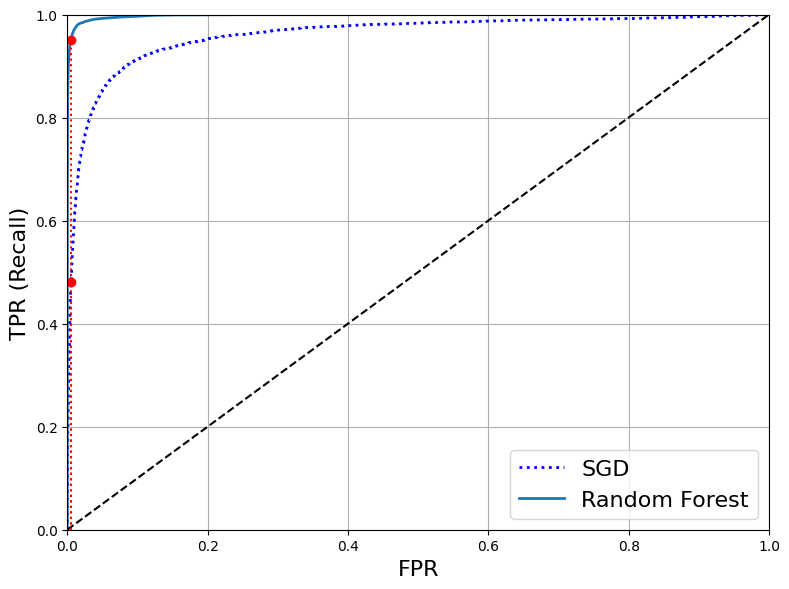

In [63]:
recall_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_forest], "r:")
plt.plot([fpr_90], [recall_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

logist_reg = LogisticRegression(random_state=42)
y_proba_logist= cross_val_predict(logist_reg, X_train, y_train_5,
                                  cv=3,
                                  method="predict_proba")

In [79]:
y_scores_logist= y_proba_logist[:,1] # score = proba of positive class
fpr_logist, tpr_logist, threshold_logist = roc_curve(y_train_5, y_score_logist)

Saving figure... roc_curve_comparison_rand_SGD_Logist_plot


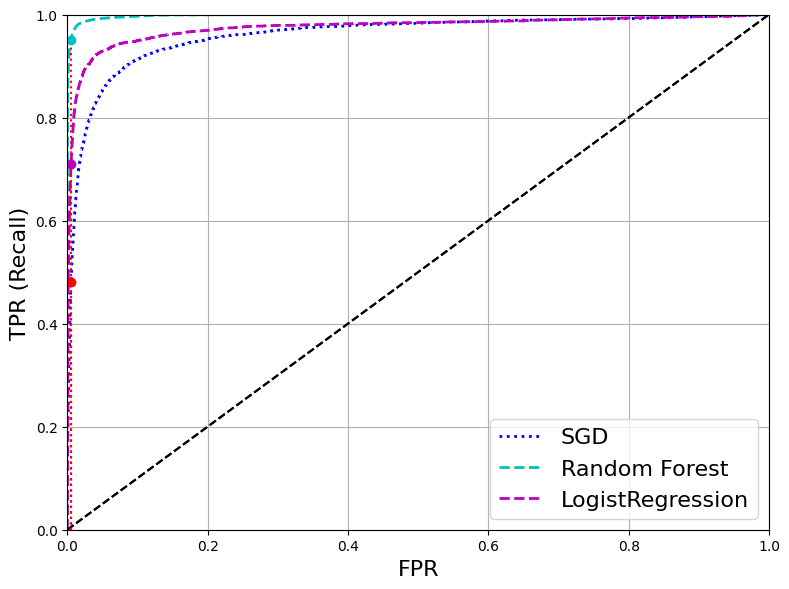

In [77]:
recall_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]
recall_logist = tpr_logist[np.argmax(fpr_logist >= fpr_90)]

plt.figure(figsize=(8, 6))
# plot
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")

plot_roc_curve(fpr_forest, tpr_forest,"c--", "Random Forest")
plot_roc_curve(fpr_logist, tpr_logist, "m--","LogistRegression")

plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") # r:red
plt.plot([fpr_90], [recall_90_precision], "ro")

# RandomForest
plt.plot([fpr_90, fpr_90], [0., recall_forest], "r:") # c: cyan
plt.plot([fpr_90], [recall_forest], "co")

# LogistRegression
plt.plot([fpr_90, fpr_90], [0., recall_logist], "r:") #m:magenta
plt.plot([fpr_90], [recall_logist], "mo")

plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_rand_SGD_Logist_plot")
plt.show()

In [86]:
# function print score ROC AUC score of models

def print_roc_auc_score(y_scores, name_classifier=None):
    print(f"ROC AUC {name_classifier}:\t",roc_auc_score(y_train_5,y_scores))


In [88]:
# ROC AUC RandomForest
print_roc_auc_score(y_scores_forest,"RandomForestClassifier")
# ROC AUC LogisticRegression
print_roc_auc_score(y_scores_logist,"LogisticRegression")
# ROC AUC SGD
print_roc_auc_score(y_scores,"SGDClassifier")

ROC AUC RandomForestClassifier:	 0.9983436731328145
ROC AUC LogisticRegression:	 0.9748673009805543
ROC AUC SGDClassifier:	 0.9604938554008616


üëâ Nh∆∞ c√≥ th·ªÉ th·∫•y `ƒë∆∞·ªùng cong ROC RandomForestClassifier` t·ªët h∆°n nhi·ªÅu so v·ªõi `SGDClassifier` v√† `LogisticRegression`: n√≥ g·∫ßn g√≥c tr√°i h∆°n do ƒë√≥ ƒëi·ªÉm `ROC AUC RandomForestClassifier cao nh·∫•t.`

### T√≠nh ƒëi·ªÉm Precision/ Recall c·ªßa RandomForestClassifier.

In [83]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
# Precision Score
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [84]:
# Recall Score
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591